<a href="https://colab.research.google.com/github/AndresNamm/StatisticsColab/blob/main/Shift_Share_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chatgpt.com/share/67504b0c-d3b0-8008-a4ad-af00621c300e

In [9]:
import pandas as pd


# Create dummy data
data = {
    'Group': ['A', 'B', 'C', 'D', 'E'],
    'Population_Y1': [1000, 2000, 1500, 800, 1200],
    'ProblemRate_Y1': [0.05, 0.10, 0.08, 0.07, 0.09],
    'Population_Y2': [1100, 1900, 1600, 850, 1100],
    'ProblemRate_Y2': [0.06, 0.09, 0.07, 0.08, 0.11],
}

df = pd.DataFrame(data)


df

,Group,Population_Y1,ProblemRate_Y1,Population_Y2,ProblemRate_Y2
0,A,1000,0.05,1100,0.06
1,B,2000,0.10,1900,0.09
2,C,1500,0.08,1600,0.07
3,D,800,0.07,850,0.08
4,E,1200,0.09,1100,0.11


In [13]:


import matplotlib.pyplot as plt
import numpy as np

# Set thresholds
POPULATION_CHANGE_THRESHOLD = 5  # 5%
PROBLEMRATE_CHANGE_THRESHOLD = 5  # 5%
EFFECT_CONTRIBUTION_THRESHOLD = 0.1  # 10% of total change


# Step 2: Calculate Total Problem Rates
df['TotalProblems_Y1'] = df['Population_Y1'] * df['ProblemRate_Y1']
df['TotalProblems_Y2'] = df['Population_Y2'] * df['ProblemRate_Y2']

TotalProblems_Y1 = df['TotalProblems_Y1'].sum()
TotalPopulation_Y1 = df['Population_Y1'].sum()
TotalProblemRate_Y1 = TotalProblems_Y1 / TotalPopulation_Y1

TotalProblems_Y2 = df['TotalProblems_Y2'].sum()
TotalPopulation_Y2 = df['Population_Y2'].sum()
TotalProblemRate_Y2 = TotalProblems_Y2 / TotalPopulation_Y2

ΔTotalProblemRate = TotalProblemRate_Y2 - TotalProblemRate_Y1

print(f"Total Problem Rate Year 1: {TotalProblemRate_Y1:.4f}")
print(f"Total Problem Rate Year 2: {TotalProblemRate_Y2:.4f}")
print(f"Change in Total Problem Rate: {ΔTotalProblemRate:.4f}\n")

# Step 3: Shift-Share Decomposition
# This effect measures the change in the total number of problems due to the change in population size,
# while keeping the problem rate constant at its Year 1 value.
df['PopulationEffect'] = (df['Population_Y2'] - df['Population_Y1']) * df['ProblemRate_Y1']
# This effect measures the change in the total number of problems due to the change in the problem rate,
# while keeping the population size constant at its Year 1 value.
df['RateEffect'] = df['Population_Y1'] * (df['ProblemRate_Y2'] - df['ProblemRate_Y1'])
df['InteractionEffect'] = (df['Population_Y2'] - df['Population_Y1']) * (df['ProblemRate_Y2'] - df['ProblemRate_Y1'])
df['TotalEffect'] = df['PopulationEffect'] + df['RateEffect'] + df['InteractionEffect']

# Step 4: Normalize Effects
df['PopulationEffectPercent'] = df['PopulationEffect'] / TotalPopulation_Y1
df['RateEffectPercent'] = df['RateEffect'] / TotalPopulation_Y1
df['InteractionEffectPercent'] = df['InteractionEffect'] / TotalPopulation_Y1
df['TotalEffectPercent'] = df['TotalEffect'] / TotalPopulation_Y1

# Step 5: Identify Notable Changes
# Calculate percentage changes
df['PopulationChangePercent'] = (df['Population_Y2'] - df['Population_Y1']) / df['Population_Y1'] * 100
df['ProblemRateChangePercent'] = (df['ProblemRate_Y2'] - df['ProblemRate_Y1']) / df['ProblemRate_Y1'] * 100

# Determine notability
df['NotablePopulationChange'] = df['PopulationChangePercent'].abs() >= POPULATION_CHANGE_THRESHOLD
df['NotableProblemRateChange'] = df['ProblemRateChangePercent'].abs() >= PROBLEMRATE_CHANGE_THRESHOLD

# Contribution to total change
TotalChangePercent = ΔTotalProblemRate  # Since TotalPopulation_Y1 is the denominator in effects
df['ContributionToTotalChangePercent'] = df['TotalEffectPercent'] / TotalChangePercent * 100
df['SignificantContribution'] = df['ContributionToTotalChangePercent'].abs() >= EFFECT_CONTRIBUTION_THRESHOLD * 100

# Step 6: Ranking and Reporting
# Rank groups by absolute contribution to total change
df['Rank'] = df['TotalEffectPercent'].abs().rank(ascending=False)

df




Total Problem Rate Year 1: 0.0822
Total Problem Rate Year 2: 0.0821
Change in Total Problem Rate: -0.0000



,Group,Population_Y1,ProblemRate_Y1,Population_Y2,ProblemRate_Y2,TotalProblems_Y1,TotalProblems_Y2,PopulationEffect,RateEffect,InteractionEffect,...,RateEffectPercent,InteractionEffectPercent,TotalEffectPercent,PopulationChangePercent,ProblemRateChangePercent,NotablePopulationChange,NotableProblemRateChange,ContributionToTotalChangePercent,SignificantContribution,Rank
0,A,1000,0.05,1100,0.06,50.0,66.0,5.0,10.0,1.0,...,0.001538,0.000154,0.002462,10.000000,20.000000,True,True,-14971.428571,True,2.0
1,B,2000,0.10,1900,0.09,200.0,171.0,-10.0,-20.0,1.0,...,-0.003077,0.000154,-0.004462,-5.000000,-10.000000,True,True,27135.714286,True,1.0
2,C,1500,0.08,1600,0.07,120.0,112.0,8.0,-15.0,-1.0,...,-0.002308,-0.000154,-0.001231,6.666667,-12.500000,True,True,7485.714286,True,5.0
3,D,800,0.07,850,0.08,56.0,68.0,3.5,8.0,0.5,...,0.001231,0.000077,0.001846,6.250000,14.285714,True,True,-11228.571429,True,4.0
4,E,1200,0.09,1100,0.11,108.0,121.0,-9.0,24.0,-2.0,...,0.003692,-0.000308,0.002000,-8.333333,22.222222,True,True,-12164.285714,True,3.0


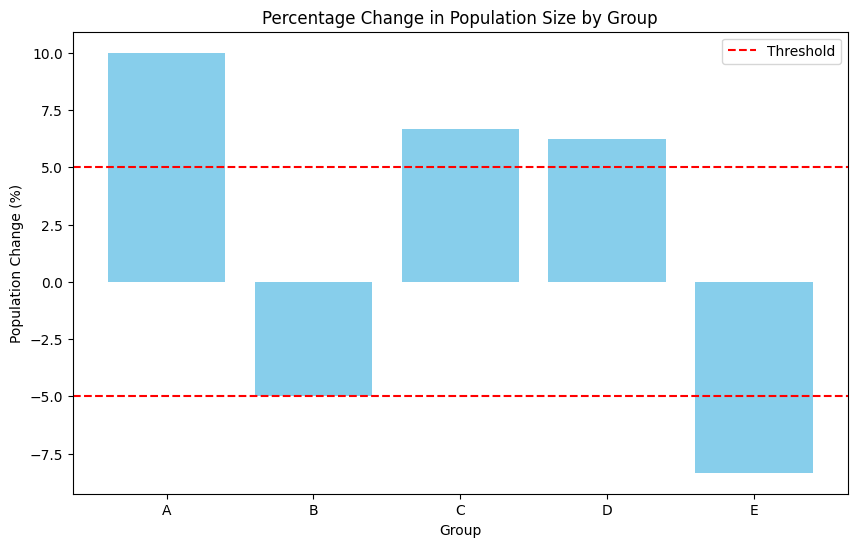

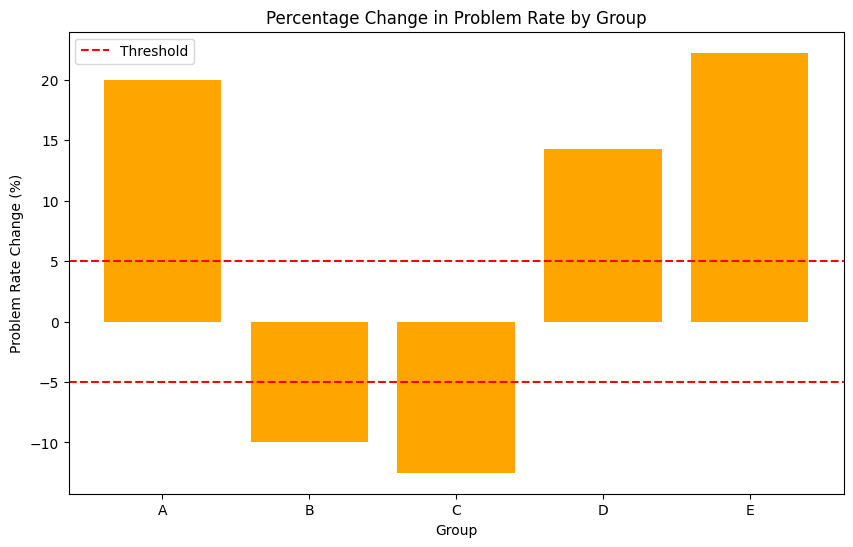

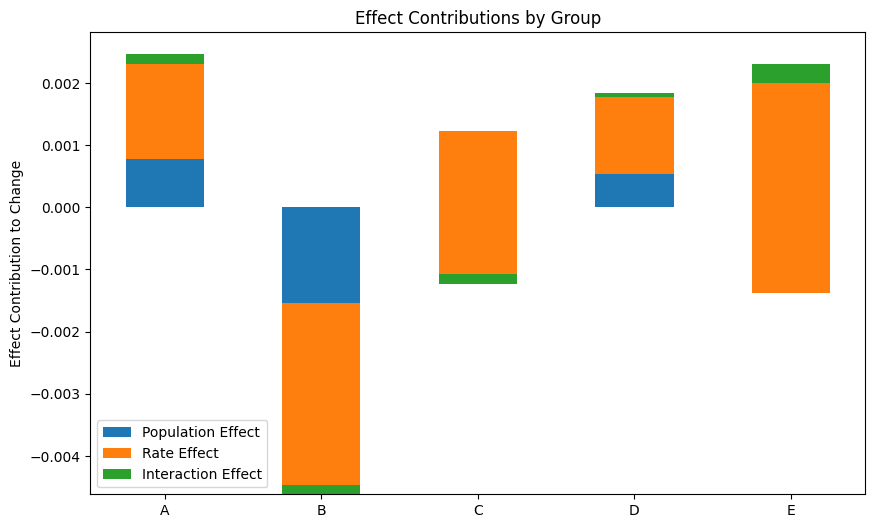

In [14]:

# Filter notable changes
notable_changes = df[
    (df['NotablePopulationChange']) |
    (df['NotableProblemRateChange']) |
    (df['SignificantContribution'])
]

# Sort by rank
notable_changes = notable_changes.sort_values('Rank')


# Visualization

# Set figure size and style

plt.rcParams['figure.figsize'] = (10, 6)

# 1. Bar Chart of Population Changes
plt.figure()
plt.bar(df['Group'], df['PopulationChangePercent'], color='skyblue')
plt.axhline(POPULATION_CHANGE_THRESHOLD, color='red', linestyle='--', label='Threshold')
plt.axhline(-POPULATION_CHANGE_THRESHOLD, color='red', linestyle='--')
plt.title('Percentage Change in Population Size by Group')
plt.xlabel('Group')
plt.ylabel('Population Change (%)')
plt.legend()
plt.show()

# 2. Bar Chart of Problem Rate Changes
plt.figure()
plt.bar(df['Group'], df['ProblemRateChangePercent'], color='orange')
plt.axhline(PROBLEMRATE_CHANGE_THRESHOLD, color='red', linestyle='--', label='Threshold')
plt.axhline(-PROBLEMRATE_CHANGE_THRESHOLD, color='red', linestyle='--')
plt.title('Percentage Change in Problem Rate by Group')
plt.xlabel('Group')
plt.ylabel('Problem Rate Change (%)')
plt.legend()
plt.show()

# 3. Stacked Bar Chart of Effect Contributions
plt.figure()
bar_width = 0.5
indices = np.arange(len(df['Group']))

population_effects = df['PopulationEffectPercent']
rate_effects = df['RateEffectPercent']
interaction_effects = df['InteractionEffectPercent']

p1 = plt.bar(indices, population_effects, bar_width, label='Population Effect')
p2 = plt.bar(indices, rate_effects, bar_width, bottom=population_effects, label='Rate Effect')
p3 = plt.bar(indices, interaction_effects, bar_width, bottom=population_effects + rate_effects, label='Interaction Effect')

plt.xticks(indices, df['Group'])
plt.ylabel('Effect Contribution to Change')
plt.title('Effect Contributions by Group')
plt.legend()
plt.show()

